In [1]:
ls

Untitled.ipynb      plot_results.py     test.sh
combine_outputs.py  results.json


In [2]:
ls

combine_outputs.py  plotting.ipynb      test.sh
plot_results.py     results.json


In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple

#  iter_cum_times = np.add.accumulate(iter_times)

experiments = json.load(open("results.json", "r"))["experiments"]


BuildInfo = namedtuple("BuildInfo", ["total_time", "num_hubs", "num_leaves", "num_levels", "num_vertices", "iter_times"])
GraphInfo = namedtuple("GraphInfo", ["total_time", "num_edges", "num_vertices", "dist_comps", "thread_edges", "thread_queries"])
ParameterInfo = namedtuple("ParameterInfo", ["min_hub_size", "num_threads", "radius", "split_ratio", "switch_percent"])
PointsInfo = namedtuple("PointsInfo", ["dimension", "float_size", "filename", "size"])

def parse_build_info(build_info):
    total_time = build_info["total_time"]
    iterations = build_info["iterations"]
    num_hubs = np.array([it["num_hubs"] for it in iterations])
    num_leaves = np.array([it["num_leaves"] for it in iterations])
    num_levels = np.array([it["num_levels"] for it in iterations])
    num_vertices = np.array([it["num_vertices"] for it in iterations])
    iter_times = np.array([it["time"] for it in iterations])
    return BuildInfo(total_time=total_time, num_hubs=num_hubs, num_leaves=num_leaves, num_levels=num_levels, num_vertices=num_vertices, iter_times=iter_times)

def parse_graph_info(graph_info):
    total_time = graph_info["total_time"]
    graph_threads = sorted(graph_info["graph_threads"], key=lambda o: o["thread_id"])
    num_edges = graph_info["num_edges"]
    num_vertices = graph_info["num_vertices"]
    dist_comps = np.array([t["thread_dist_comps"] for t in graph_threads])
    thread_edges = np.array([t["thread_edges"] for t in graph_threads])
    thread_queries = np.array([t["thread_queries"] for t in graph_threads])
    thread_times = np.array([t["thread_time"] for t in graph_threads])
    return GraphInfo(total_time=total_time, num_edges=num_edges, num_vertices=num_vertices, dist_comps=dist_comps, thread_edges=thread_edges, thread_queries=thread_queries)

def parse_parameter_info(parameter_info):
    return ParameterInfo(min_hub_size=parameter_info["min_hub_size"], num_threads=parameter_info["num_threads"], radius=parameter_info["radius"], split_ratio=parameter_info["split_ratio"], switch_percent=parameter_info["switch_percent"])

def parse_points_info(points_info):
    return PointsInfo(dimension=points_info["dimension"], float_size=points_info["float_size"], filename=points_info["filename"], size=points_info["size"])


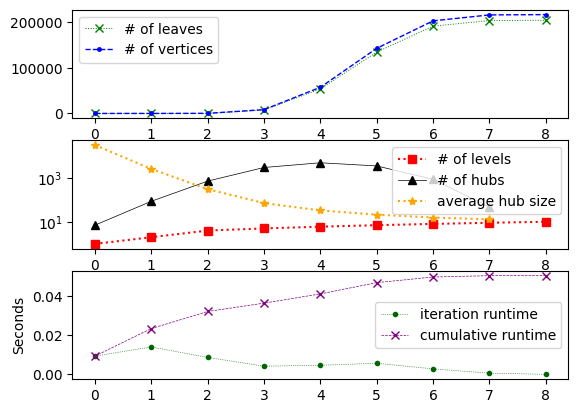

In [10]:
exp = experiments[0]

build_info = parse_build_info(exp["build_info"])
graph_info = parse_graph_info(exp["graph_info"])
parameter_info = parse_parameter_info(exp["parameter_info"])
points_info = parse_points_info(exp["points_info"])

fig, axs = plt.subplots(3)

cumulative_times = np.add.accumulate(build_info.iter_times)
xdata = np.array(range(len(build_info.num_hubs)))
avg_hub_sizes = (points_info.size - build_info.num_leaves)[:-1] / (build_info.num_hubs)[:-1]

axs[0].plot(xdata, build_info.num_leaves, ':x', linewidth=0.7, color='green', label="# of leaves")
axs[0].plot(xdata, build_info.num_vertices, '--o', markersize=2.5, linewidth=1.0, color='blue', label="# of vertices")
axs[0].legend()

axs[1].plot(xdata, build_info.num_levels, ':s', color='red', label="# of levels")
axs[1].plot(xdata[:-1], build_info.num_hubs[:-1], '-^', linewidth=0.5, color='black', label="# of hubs")
axs[1].plot(xdata[:-1], avg_hub_sizes, ':*', color='orange', label="average hub size")
axs[1].set_yscale("log")
axs[1].legend()

axs[2].plot(xdata, build_info.iter_times, ':.', linewidth=0.5, color='darkgreen', label="iteration runtime")
axs[2].plot(xdata, cumulative_times, '--x', linewidth=0.5, color='purple', label="cumulative runtime")
axs[2].set_ylabel("Seconds")
axs[2].legend()



